# Scikit-learn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, classification_report,
    mean_squared_error, r2_score,
    silhouette_score
)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA # For dimensionality reduction example


### --- 1. Data Loading (Using Scikit-learn's built-in datasets) ---

In [8]:

print("\n1. Data Loading")
print("---------------")
# Classification Dataset: Iris (a classic for classification)
iris = datasets.load_iris()
X_iris = iris.data  # Features
y_iris = iris.target # Target labels (0, 1, 2 for different species)
print(f"Iris dataset: {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"Iris target classes: {iris.target_names}")

# Regression Dataset: Diabetes (predicting disease progression)
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
print(f"\nDiabetes dataset: {X_diabetes.shape[0]} samples, {X_diabetes.shape[1]} features")


1. Data Loading
---------------
Iris dataset: 150 samples, 4 features
Iris target classes: ['setosa' 'versicolor' 'virginica']

Diabetes dataset: 442 samples, 10 features


### --- 2. Data Splitting (Training and Testing Sets) ---

In [9]:

print("\n2. Data Splitting (train_test_split)")
print("-----------------------------------")
# For Classification (Iris)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris # stratify for balanced classes
)
print(f"Iris Training Set Size: {X_train_iris.shape[0]} samples")
print(f"Iris Test Set Size: {X_test_iris.shape[0]} samples")

# For Regression (Diabetes)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)
print(f"\nDiabetes Training Set Size: {X_train_diabetes.shape[0]} samples")
print(f"Diabetes Test Set Size: {X_test_diabetes.shape[0]} samples")



2. Data Splitting (train_test_split)
-----------------------------------
Iris Training Set Size: 105 samples
Iris Test Set Size: 45 samples

Diabetes Training Set Size: 353 samples
Diabetes Test Set Size: 89 samples


### --- 3. Data Preprocessing (Scaling) ---

In [10]:

print("\n3. Data Preprocessing (StandardScaler, MinMaxScaler)")
print("--------------------------------------------------")
# Standardization (Z-score normalization: mean=0, std=1) - often good for models assuming Gaussian distribution or using distance metrics
scaler_standard = StandardScaler()
X_train_iris_scaled = scaler_standard.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_standard.transform(X_test_iris) # Use transform, not fit_transform on test set
print(f"Iris features after StandardScaler (first 5 of training):\n{X_train_iris_scaled[:5].round(2)}")

# Normalization (Min-Max scaling: values between 0 and 1) - useful for neural networks or algorithms sensitive to feature ranges
scaler_minmax = MinMaxScaler()
X_train_diabetes_scaled = scaler_minmax.fit_transform(X_train_diabetes)
X_test_diabetes_scaled = scaler_minmax.transform(X_test_diabetes)
print(f"\nDiabetes features after MinMaxScaler (first 5 of training):\n{X_train_diabetes_scaled[:5].round(2)}")


3. Data Preprocessing (StandardScaler, MinMaxScaler)
--------------------------------------------------
Iris features after StandardScaler (first 5 of training):
[[-0.9  -1.22 -0.44 -0.14]
 [ 0.38 -1.88  0.4   0.38]
 [-0.9   1.64 -1.29 -1.17]
 [ 1.08  0.32  1.19  1.41]
 [-0.2  -0.56  0.18  0.12]]

Diabetes features after MinMaxScaler (first 5 of training):
[[0.82 1.   0.41 0.69 0.54 0.52 0.22 0.42 0.59 0.5 ]
 [0.45 1.   0.28 0.32 0.34 0.41 0.1  0.56 0.49 0.58]
 [0.52 0.   0.56 0.86 0.36 0.32 0.34 0.28 0.55 0.45]
 [0.37 0.   0.22 0.34 0.2  0.18 0.47 0.14 0.29 0.03]
 [0.38 0.   0.09 0.13 0.27 0.2  0.57 0.   0.34 0.35]]


### --- 4. Model Training and Prediction (Classification) ---

In [11]:

print("\n4. Model Training & Prediction (Classification - Logistic Regression)")
print("------------------------------------------------------------------")
# Initialize the model
log_reg = LogisticRegression(max_iter=200, random_state=42) # Increased max_iter for convergence

# Train the model on the scaled training data
log_reg.fit(X_train_iris_scaled, y_train_iris)

# Make predictions on the scaled test data
y_pred_iris = log_reg.predict(X_test_iris_scaled)

# Predict probabilities (useful for confidence or ROC curves)
y_proba_iris = log_reg.predict_proba(X_test_iris_scaled)
print(f"Predicted classes (first 5): {y_pred_iris[:5]}")
print(f"Predicted probabilities for first sample (sum to 1): {y_proba_iris[0].round(2)}")


4. Model Training & Prediction (Classification - Logistic Regression)
------------------------------------------------------------------
Predicted classes (first 5): [2 1 1 1 2]
Predicted probabilities for first sample (sum to 1): [0.  0.1 0.9]


### --- 5. Model Evaluation (Classification) ---

In [12]:

print("\n5. Model Evaluation (Classification Metrics)")
print("------------------------------------------")
accuracy = accuracy_score(y_test_iris, y_pred_iris)
print(f"Accuracy Score: {accuracy:.4f}")

# Comprehensive report with precision, recall, f1-score
class_report = classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names)
print(f"\nClassification Report:\n{class_report}")


5. Model Evaluation (Classification Metrics)
------------------------------------------
Accuracy Score: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45




### --- 6. Model Training and Prediction (Regression) ---

In [13]:

print("\n6. Model Training & Prediction (Regression - Linear Regression)")
print("------------------------------------------------------------")
# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_diabetes_scaled, y_train_diabetes)

# Make predictions
y_pred_diabetes = lin_reg.predict(X_test_diabetes_scaled)
print(f"Predicted values (first 5): {y_pred_diabetes[:5].round(2)}")
print(f"Actual values (first 5): {y_test_diabetes[:5]}")



6. Model Training & Prediction (Regression - Linear Regression)
------------------------------------------------------------
Predicted values (first 5): [139.55 179.52 134.04 291.42 123.79]
Actual values (first 5): [219.  70. 202. 230. 111.]


### --- 7. Model Evaluation (Regression) ---

In [14]:

print("\n7. Model Evaluation (Regression Metrics)")
print("--------------------------------------")
mse = mean_squared_error(y_test_diabetes, y_pred_diabetes)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test_diabetes, y_pred_diabetes)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


7. Model Evaluation (Regression Metrics)
--------------------------------------
Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R-squared (R2) Score: 0.45


### --- 8. Clustering (Unsupervised Learning) ---


8. Clustering (KMeans)
----------------------
First 10 cluster assignments: [1 1 1 1 1 1 1 1 1 1]
Cluster centers:
[[5.9  2.75 4.39 1.43]
 [5.01 3.43 1.46 0.25]
 [6.85 3.07 5.74 2.07]]
Silhouette Score (higher is better, closer to 1): 0.5528


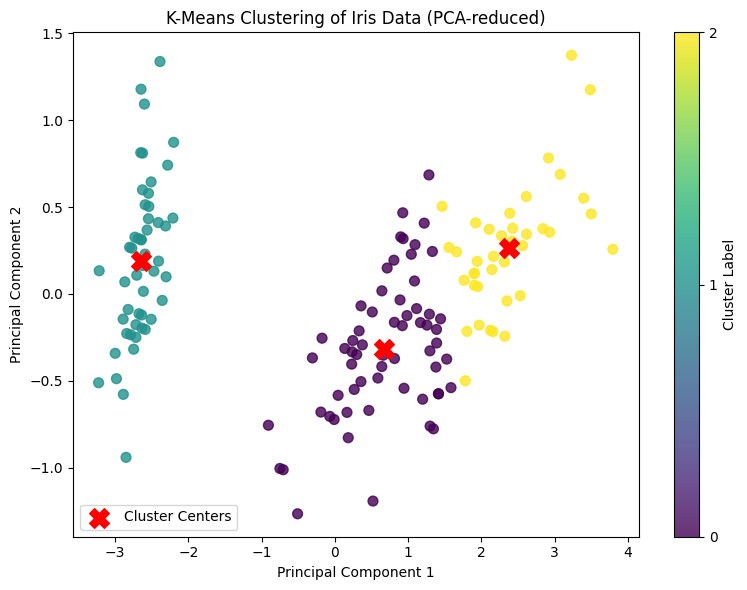

In [15]:

print("\n8. Clustering (KMeans)")
print("----------------------")
# Use the unscaled Iris data for clustering example
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_clusters = number of expected groups
kmeans.fit(X_iris)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(f"First 10 cluster assignments: {cluster_labels[:10]}")
print(f"Cluster centers:\n{cluster_centers.round(2)}")

# Evaluate clustering (e.g., Silhouette Score)
# Note: Silhouette score requires more than 1 cluster and less than n_samples-1
if len(np.unique(cluster_labels)) > 1 and len(np.unique(cluster_labels)) < len(X_iris) - 1:
    silhouette_avg = silhouette_score(X_iris, cluster_labels)
    print(f"Silhouette Score (higher is better, closer to 1): {silhouette_avg:.4f}")
else:
    print("Cannot compute Silhouette Score (too few or too many clusters relative to data size).")

# Visualizing clusters (optional, requires dimensionality reduction for >2D data)
# Use PCA to reduce to 2 dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(pca.transform(cluster_centers)[:, 0], pca.transform(cluster_centers)[:, 1],
            marker='X', s=200, color='red', label='Cluster Centers')
plt.title('K-Means Clustering of Iris Data (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, ticks=[0, 1, 2], label='Cluster Label')
plt.tight_layout()
plt.show()


### --- 9. Pipelines and Hyperparameter Tuning (GridSearchCV) ---

In [16]:
print("\n9. Pipelines and Hyperparameter Tuning (GridSearchCV)")
print("-----------------------------------------------------")

# Create a pipeline: step 1 (scaling) -> step 2 (classifier)
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Scale the features
    ('knn', KNeighborsClassifier())     # Step 2: K-Nearest Neighbors Classifier
])

# Define the parameter grid for GridSearchCV
# Note: Parameters for pipeline steps are named 'stepname__parameter'
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors for KNN
    'knn__weights': ['uniform', 'distance'] # Weight function used in prediction
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_iris, y_train_iris) # Use original unscaled data; pipeline handles scaling

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the (unseen) test set
y_pred_best = best_model.predict(X_test_iris)
final_accuracy = accuracy_score(y_test_iris, y_pred_best)
print(f"Test set accuracy with best model: {final_accuracy:.4f}")


print("\n--- End of Scikit-learn Script ---")


9. Pipelines and Hyperparameter Tuning (GridSearchCV)
-----------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found: {'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross-validation accuracy: 0.9714
Test set accuracy with best model: 0.9333

--- End of Scikit-learn Script ---
